In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KC House Price Prediction/df_final.csv')

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [5]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [7]:
df.shape

(21597, 20)

In [8]:
x = df.drop('price', axis = 1)

In [9]:
y = df['price']

In [10]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [11]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [12]:
x.shape

(21597, 19)

In [13]:
y.shape

(21597,)

##Feature Selection

In [14]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

[0.00769908 0.0353286  0.19381682 0.01251524 0.00777365 0.0413473
 0.03641162 0.00987757 0.25332093 0.06223836 0.01236135 0.03682367
 0.00604084 0.13907673 0.05324598 0.06677365 0.01175719 0.00553284
 0.00805858]


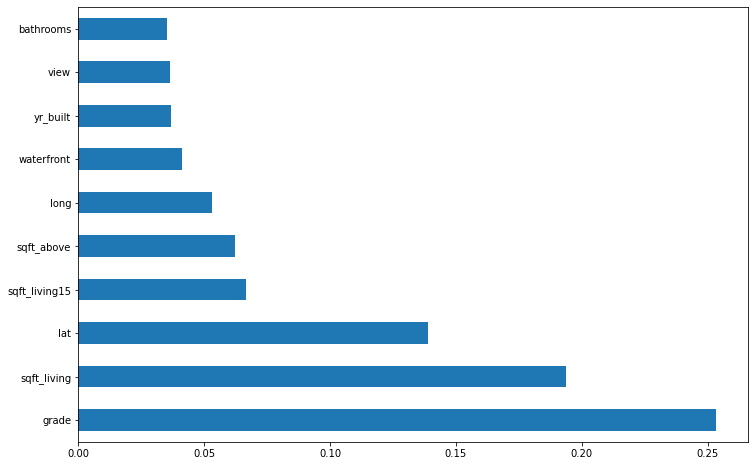

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

print(selection.feature_importances_)


plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index= x.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

In [17]:
x_train.shape

(14469, 19)

In [18]:
y_train.shape

(14469,)

In [19]:
x_test.shape

(7128, 19)

In [20]:
y_test.shape

(7128,)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([502850.61, 258176.  , 463575.45, ..., 286802.5 , 522304.5 ,
       359325.44])

In [ ]:
model.score(x_train, y_train)

0.983710842765811

In [ ]:
model.score(x_test, y_test)

0.8433604207891215

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared score:", r2_score(y_test, y_pred))

MAE: 70614.33290263748
MSE: 19276560516.51264
RMSE: 138840.053718344
R-squared score: 0.8433604207891215


###RandomForestRegressor fine-tunning

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
rf_grid = {'n_estimators': [100, 200, 300, 400, 500],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'max_depth': [None, 10, 100],
           'max_features': ['auto']}


rf_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions = rf_grid,
                             scoring = 'neg_mean_absolute_error', 
                             n_iter = 20,
                             cv = 5, 
                             n_jobs = -1)

In [25]:
rf_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [26]:
y_pred_rf = rf_model.predict(x_test)

In [27]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared score:", r2_score(y_test, y_pred_rf))

MAE: 67771.49636117798
MSE: 14604387561.151445
RMSE: 120848.61422933837
R-squared score: 0.8721674505298347


##Trying other model along with fine-tuning

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

###KNeighborsRegressor

In [29]:
k_range = list(range(1, 10))
params = dict(n_neighbors = k_range)

knn_regressor = GridSearchCV(KNeighborsRegressor(),
                             params, cv =10,
                             scoring = 'neg_mean_squared_error')

knn_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [30]:
y_pred_kneighbor = knn_regressor.predict(x_test)

In [31]:
print('MAE:', mean_absolute_error(y_test, y_pred_kneighbor))
print('MSE:', mean_squared_error(y_test, y_pred_kneighbor))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_kneighbor)))
print("R-squared score:", r2_score(y_test, y_pred_kneighbor))

MAE: 150742.652234147
MSE: 55203797430.089165
RMSE: 234954.88381833897
R-squared score: 0.5167998564558446


###XGBRegressor

In [32]:
xgb_params = {'max_depth': [1, 2, 3, 4, 5],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'n_estimators': [100, 200, 300, 400, 500],
              'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}

xgb_model = RandomizedSearchCV(XGBRegressor(),
                           xgb_params,
                           n_iter=20,
                           scoring = 'neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

xgb_model.fit(x_train, y_train)

[23:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [33]:
y_pred_xgb = xgb_model.predict(x_test)

In [34]:
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R-squared score:", r2_score(y_test, y_pred_xgb))

MAE: 63471.3891804328
MSE: 11752580729.484564
RMSE: 108409.32030727138
R-squared score: 0.8971293831245398
